In [8]:
%load_ext autoreload
%autoreload 2
from sklearn.datasets import fetch_openml
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from models import *
from sklearn import svm
from tqdm.notebook import tqdm
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [9]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = False)
y = y.astype(np.int)

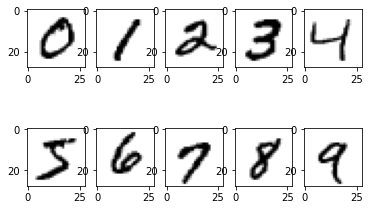

In [3]:
showMnistExamples(X, y, 0)

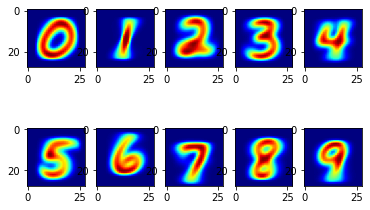

In [4]:
showDistributions(X, y)

# Logistic Regression

In [ ]:
model = LogisticRegression(penalty='l1', solver='saga', max_iter=100, tol=1)
mc = MNISTClassifier(model, X, y)

In [ ]:
print(mc.modelScore)

0.9113714285714286


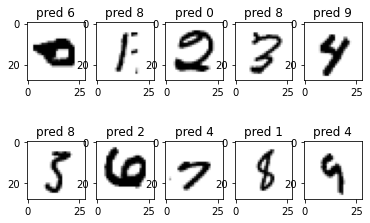

In [ ]:
mc.showWrongOnes(2)

In [ ]:
scores = mc.getCrossValidateScore()
print("%0.2f accuracy with a standard deviation of %0.8f" % (scores.mean(), scores.std()))


0.91 accuracy with a standard deviation of 0.00490868


# SVM

gridsearch

In [ ]:
Cs = [1e1,7,5,3,1]
kernels = ["poly", 'rbf']
scmax = 0
best_kernel = ""
bestC = 0
with tqdm(total=100) as pbar:
    for C in Cs:
        for kernel in kernels:
            model = svm.SVC(C=C, kernel=kernel, tol=1)
            mcf = MNISTClassifier(model, X[:5000], y[:5000], fitting=False)
            sc = mcf.getCrossValidateScore().mean()
            if sc > scmax:
                scmax = sc
                best_kernel = kernel
                bestC = C    
            pbar.update(100 / (len(Cs) * len(kernels)))

print(f'score for {scmax} {bestC} {best_kernel}')


score for 0.9536 5 rbf


In [9]:
parameters = {'kernel':('poly', 'rbf'), 'C':[1e1, 7, 5, 3], 'tol': [1]}
model = svm.SVC()
clf = GridSearchCV(model, parameters)
clf.fit(X[:5000], y[:5000])
print(f"best score {clf.best_score_} for params: {clf.best_params_}")


best score 0.9536 for params: {'C': 5, 'kernel': 'rbf', 'tol': 1}


На всех данных

0.9832571428571428


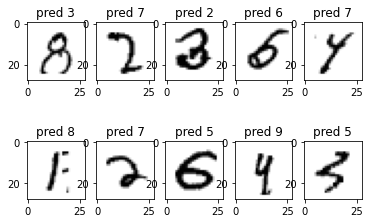

In [5]:
model = svm.SVC(C=5, kernel='rbf', tol=1)
mcf = MNISTClassifier(model, X, y)
print(mcf.modelScore)
mcf.showWrongOnes(0)

# KNN

In [11]:
parameters = {'n_neighbors':(1, 3, 5, 7)}
model = KNeighborsClassifier()
clf = GridSearchCV(model, parameters)
clf.fit(X[:5000], y[:5000])
print(f"best score {clf.best_score_} for params: {clf.best_params_}")

best score 0.932 for params: {'n_neighbors': 1}


0.9731428571428572


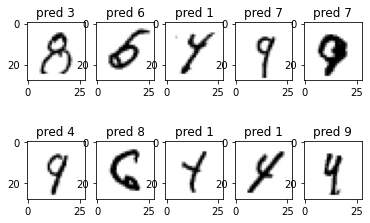

In [10]:
model = KNeighborsClassifier(n_neighbors=1)
mcf = MNISTClassifier(model, X, y)
print(mcf.modelScore)
mcf.showWrongOnes(0)

# PCA + SVM

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 49)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model = svm.SVC(C=5, kernel='rbf', tol=1)
model.fit(X_train_pca,y_train)
print(model.score(X_test_pca,y_test))

0.9853714285714286


In [5]:
model = svm.SVC(C=5, kernel='rbf', tol=1)
mc = MNISTClassifier(model,X,y,PCA_flag=True,components=49)
scores = mc.getCrossValidateScore()
print("%0.4f accuracy with a standard deviation of %0.8f" % (scores.mean(), scores.std()))

0.9846 accuracy with a standard deviation of 0.00150875


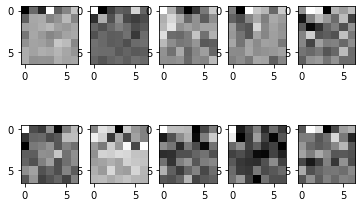

In [10]:
showMnistExamples(X_test_pca,y_test,0,7,7)

In [42]:
n = np.array([[0,1,2,3],[1,2,3,4],[0,1,4,5]])
print(np.sum(n, axis = 0))

[ 1  4  9 12]


# Decision Tree

In [41]:

parameters = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random')}
model = DecisionTreeClassifier()
clf = GridSearchCV(model, parameters)
clf.fit(X[:5000], y[:5000])
print(f"best score {clf.best_score_} for params: {clf.best_params_}")

best score 0.7714000000000001 for params: {'criterion': 'entropy', 'splitter': 'random'}


In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = clf.best_params_['criterion'], splitter = 'random')
mc = MNISTClassifier(model,X,y)
scores = mc.getCrossValidateScore()
print("%0.4f accuracy with a standard deviation of %0.8f" % (scores.mean(), scores.std()))

0.8775 accuracy with a standard deviation of 0.00664084


# Препроцессинг данных

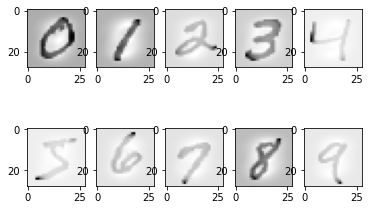

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_mod = scaler.fit_transform(X,y)
showMnistExamples(X_mod,y,0)

PCA + SVM + StandardScaler 

In [7]:

model = svm.SVC(C=5, kernel='rbf', tol=1)
mc = MNISTClassifier(model,X_mod,y,PCA_flag=True,components=49)
scores = mc.getCrossValidateScore()
print("%0.4f accuracy with a standard deviation of %0.8f" % (scores.mean(), scores.std()))

0.9752 accuracy with a standard deviation of 0.00208522


MinMaxScaler

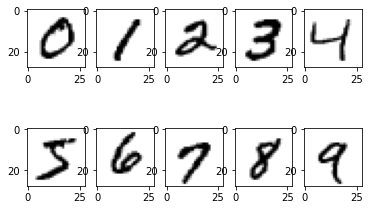

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_mod = scaler.fit_transform(X,y)
showMnistExamples(X_mod,y,0)

PCA + SVM + MinMaxScaler

In [23]:
model = svm.SVC(C=5, kernel='rbf', tol=1)
mc = MNISTClassifier(model,X_mod,y,PCA_flag=True,components=49)
scores = mc.getCrossValidateScore()
print("%0.4f accuracy with a standard deviation of %0.8f" % (scores.mean(), scores.std()))

0.9840 accuracy with a standard deviation of 0.00129284


Text(0.5, 1.0, 'MNIST. PCA projection')

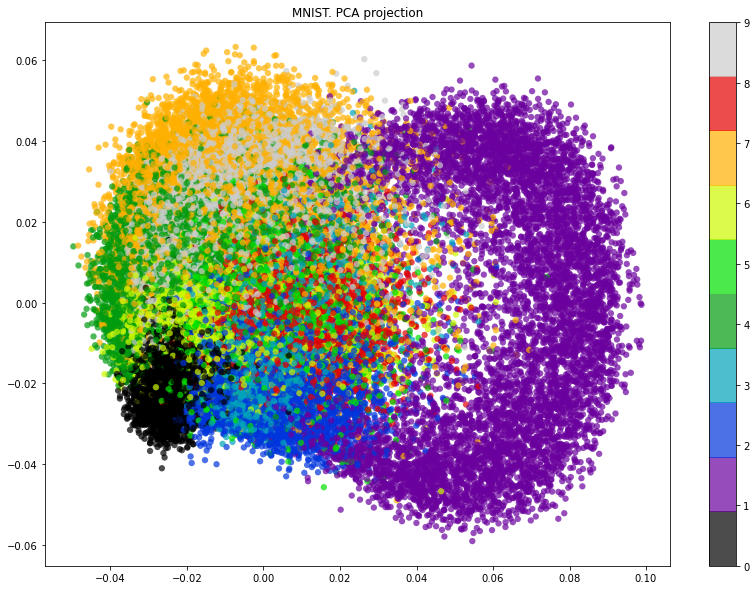

In [32]:
plt.figure(figsize=(14,10))
plt.scatter(mc.X[:, 0], mc.X[:, 1], c=mc.y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')

In [57]:
mask = np.all(X==0, axis=0)
mask_to_img_size = np.reshape(mask, (28,28))
rows = np.flatnonzero(mask_to_img_size.sum(axis=0))
cols = np.flatnonzero(mask_to_img_size.sum(axis=1))
x_to_img_size = np.reshape(X, (X.shape[0],28,28))
X_without_empty_els = x_to_img_size[:,rows.min():rows.max()+1, cols.min():cols.max()+1]
print(x_to_img_size.shape)

(70000, 28, 28)


Ничего не изменилось..

grdsearch done , decision tree done, нормализация признаков done, распределения данных done